In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [71]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 0 # 0 for top
bottom['type'] = 1 # 1 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df.head()

,title,artist,genre,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,id,type
0,DIE,Gazo,"drill francais, rap francais",1,0.695,0.630,8.0,-7.160,0.0,0.0350,0.22900,0.000000,0.118,0.550,130.968,240413,4.0,"[Paroles de ""DIE""] [Intro] La mala est gangx E...",3D29kjUyWxsT3jUUTtARVQ,0
1,Balader,Soolking,"francoton, french hip hop, pop urbaine, rap al...",2,0.603,0.802,4.0,-5.089,0.0,0.1110,0.30600,0.000051,0.124,0.787,130.121,176120,4.0,"[Paroles de ""Balader"" ft. Niska] [Intro : Soo...",6PrB4KpvuoYWtwjPC5a44S,0
2,FADE UP,ZEG P,NaN,3,0.758,0.599,4.0,-5.990,0.0,0.0877,0.57000,0.000001,0.129,0.557,129.960,219188,4.0,"[Paroles de ""FADE UP"" ft. Hamza & SCH] [Intro ...",4ZpIuzx91EAPK3VimONbfB,0
3,I'm Good (Blue),David Guetta,"big room, dance pop, edm, pop, pop dance",4,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.371,0.304,128.040,175238,4.0,[Chorus] I'm good yeah I'm feelin' alright Bab...,4uUG5RXrOk84mYEfFvj3cK,0
4,Carolina,Ninho,"french hip hop, pop urbaine",5,0.791,0.904,11.0,-2.830,0.0,0.0956,0.38400,0.003520,0.106,0.361,100.077,195459,4.0,"[Paroles de ""Carolina"" ft. Ninho] [Refrain] Ca...",22IP2WKjuGYQ19JAz5GpAv,0


In [72]:
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'genre', 'id'], axis = 1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,type
0,0.695,0.630,8.0,-7.160,0.0,0.0350,0.22900,0.000000,0.118,0.550,130.968,240413,4.0,0
1,0.603,0.802,4.0,-5.089,0.0,0.1110,0.30600,0.000051,0.124,0.787,130.121,176120,4.0,0
2,0.758,0.599,4.0,-5.990,0.0,0.0877,0.57000,0.000001,0.129,0.557,129.960,219188,4.0,0
3,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.371,0.304,128.040,175238,4.0,0
4,0.791,0.904,11.0,-2.830,0.0,0.0956,0.38400,0.003520,0.106,0.361,100.077,195459,4.0,0


In [73]:
Y = df.pop('type')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

len(X_train), len(X_vali), len(X_test)

(357, 119, 119)

In [74]:
# Uncomment for CNN model

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# X_vali = np.array(X_vali)
# X_train = X_train.reshape(X_train.shape[0],  X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)
# X_vali = X_vali.reshape(X_vali.shape[0],  X_vali.shape[1], 1)
X_train.shape

(357, 13)

In [121]:
# CNN Model

# model = keras.Sequential([
#   layers.Normalization(input_shape=(X_train.shape[1], 1)),
#   layers.Conv1D(64, (3), activation='relu', padding='same'),
#   layers.MaxPooling1D((2)),
#   layers.Conv1D(32, (3), activation='relu', padding='same'),
#   layers.MaxPooling1D((2)),
#   layers.Conv1D(16, (3), activation='relu', padding='same'),
#   layers.MaxPooling1D((2)),
#   layers.Flatten(),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(1, activation='sigmoid')
# ])
# model.summary()

# Fully Connected Model

model = keras.Sequential([
  layers.BatchNormalization(input_shape=(X_train.shape[1],)),
  layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
  layers.BatchNormalization(),
  layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
  layers.BatchNormalization(),
  layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
  layers.BatchNormalization(),
  layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_40 (Bat  (None, 13)               52        
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 256)               3584      
                                                                 
 batch_normalization_41 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_42 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                     

In [122]:
model.compile(optimizer="adam", 
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [123]:
earlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                             patience=20)

results = model.fit(X_train, y_train, 
                  epochs=200, 
                  validation_data=(X_vali, y_vali), 
                  callbacks=[earlyStop]
                  )

Epoch 1/200


C:\Users\nao3n\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 27ms/step - loss: 0.7678 - accuracy: 0.5406 - val_loss: nan - val_accuracy: 0.5378
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.6863 - val_loss: nan - val_accuracy: 0.5546


C:\Users\nao3n\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5617 - accuracy: 0.7003 - val_loss: nan - val_accuracy: 0.5882
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7339 - val_loss: nan - val_accuracy: 0.5630
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 0.7395 - val_loss: nan - val_accuracy: 0.5462
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.7563 - val_loss: nan - val_accuracy: 0.5462
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7871 - val_loss: nan - val_accuracy: 0.5462
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.7955 - val_loss: nan - val_accuracy: 0.5630
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4505 - accuracy: 0.7983 - val_loss: nan - val_accuracy: 0.5546
Epoch 10/200
12/12 [==============

In [124]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")

4/4 [==============================] - 0s 2ms/step - loss: 0.9774 - accuracy: 0.5378
Accuracy: 0.538


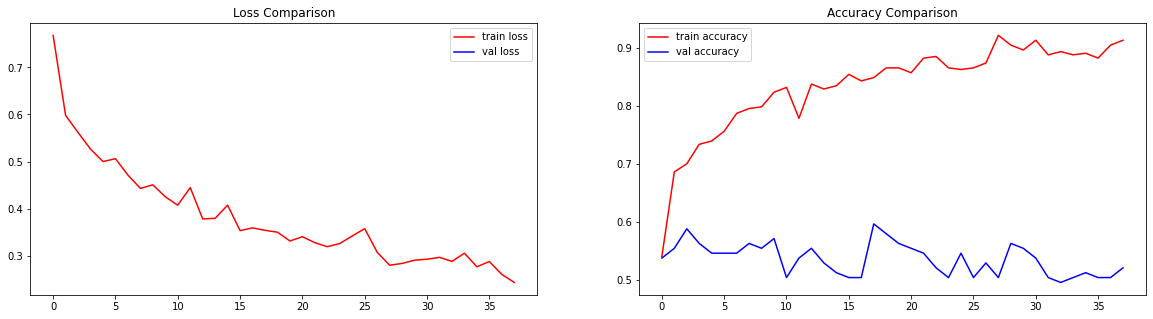

In [125]:
# Plotting the loss and accuracy of the model
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].plot(results.history["loss"], color='r', label = 'train loss')
axis[0].plot(results.history["val_loss"], color='b', label = 'val loss')
axis[0].set_title('Loss Comparison')
axis[0].legend()
axis[1].plot(results.history["accuracy"], color='r', label = 'train accuracy')
axis[1].plot(results.history["val_accuracy"], color='b', label = 'val accuracy')
axis[1].set_title('Accuracy Comparison')
axis[1].legend()